# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/miguelgunawan/dataset-w2-Data-Mining/refs/heads/main/penguins_size.csv')
df.sample(10)
# import dataset yang suda di upload di github

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
82,Adelie,Torgersen,36.7,18.8,187.0,3800.0,FEMALE
305,Gentoo,Biscoe,50.8,17.3,228.0,5600.0,MALE
165,Chinstrap,Dream,52.0,18.1,201.0,4050.0,MALE
328,Gentoo,Biscoe,43.3,14.0,208.0,4575.0,FEMALE
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
25,Adelie,Biscoe,35.3,18.9,187.0,3800.0,FEMALE
131,Adelie,Torgersen,43.1,19.2,197.0,3500.0,MALE
91,Adelie,Dream,41.1,18.1,205.0,4300.0,MALE
39,Adelie,Dream,39.8,19.1,184.0,4650.0,MALE
279,Gentoo,Biscoe,50.4,15.3,224.0,5550.0,MALE


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [5]:
#2
df.info()
# dapat melihat informasi dari dataset seperti coloumn mana yang memiliki non null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [6]:
#3
df.describe()
# dari describe data ini kia dapat mengetahui jumlah data, mean, mini, dan max dari setiap coloumn

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [7]:
#4
col_names = ['species', 'island', 'sex']

for col in col_names:
    print(df[col].value_counts(dropna=False))
# fungsi utamanya adalah untuk menghitung dan mencetak frekuensi kemunculan setiap nilai unik dari kolom yang ditentukan dalam DataFrame,
# menggunakan loop for

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sex
MALE      168
FEMALE    165
NaN        10
.           1
Name: count, dtype: int64


5. Null handling

In [8]:
#5
df.dropna(inplace=True)
df.isnull().sum()
# disini cleansing data dengan drop rows data yang memiliki null value, lalu check kembali

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


6. Create your own insightful visualization and explain it in at least 2 sentences

<function matplotlib.pyplot.show(close=None, block=None)>

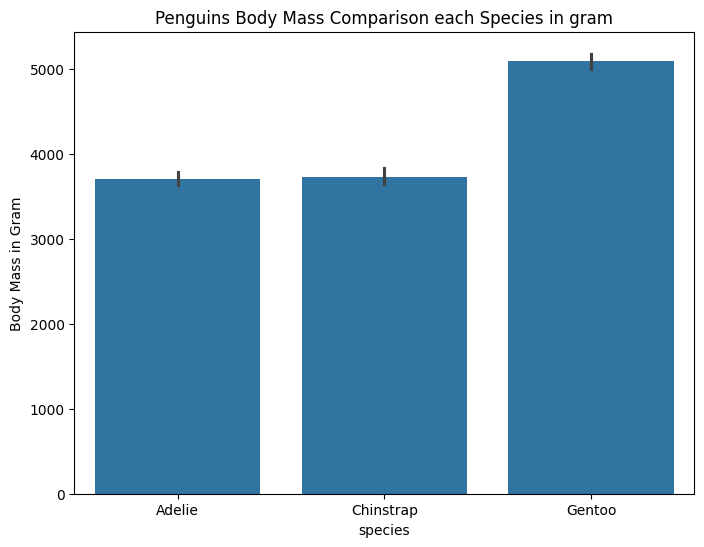

In [9]:
#6
plt.figure(figsize=(8,6))
sns.barplot(x=df['species'], y=df['body_mass_g'])
plt.title('Penguins Body Mass Comparison each Species in gram')
plt.xlabel('species')
plt.ylabel('Body Mass in Gram')
plt.show
# dengan menggunakan bar chart ini saya ingin membandingkan berat badan penguin dalam gram antar species penguin yang ada
# di sini dapat kita lihat bahwa species gentoo memiliki rata-rata berat badan yang lebih berat

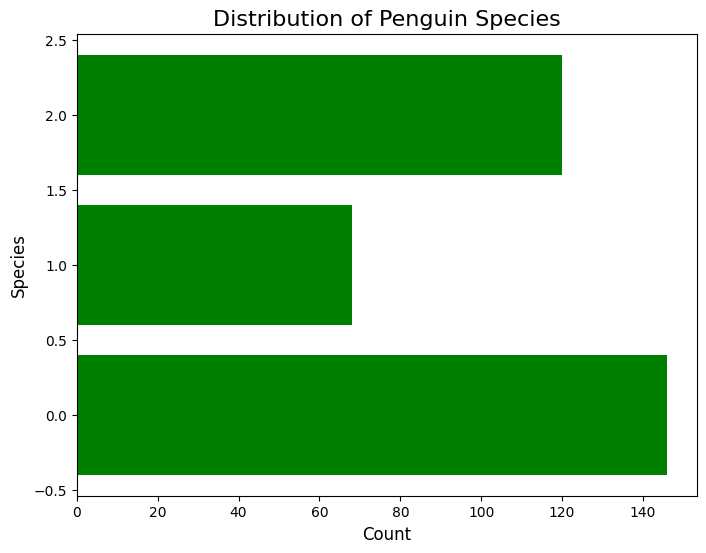

In [38]:
import matplotlib.pyplot as plt

species_counts = df['species'].value_counts()

plt.figure(figsize=(8, 6))
plt.barh(species_counts.index, species_counts.values, color='green')

plt.title('Distribution of Penguin Species', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Species', fontsize=12)

plt.show()


7. Check unique value of our target variable

In [10]:
#7
df['species'].unique()
# code ini digunakan untuk check apakah ada unique value dalam data species

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

8. encode categorical columns and display the results

In [11]:
#8
label_encoder = LabelEncoder()
df['island'] = label_encoder.fit_transform(df['island'])
df['sex'] = label_encoder.fit_transform(df['sex'])

df.head()
# dengan code encode ini saya ingin mengubah string agar menjadi integer
# disini saya mengubah variabel island dan sex dari string menjadi integer

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,2
1,Adelie,2,39.5,17.4,186.0,3800.0,1
2,Adelie,2,40.3,18.0,195.0,3250.0,1
4,Adelie,2,36.7,19.3,193.0,3450.0,1
5,Adelie,2,39.3,20.6,190.0,3650.0,2


9. encode the target column and display the results

In [12]:
#9
df['species'] = label_encoder.fit_transform(df['species'])
df.sample(5)
# disini saya ingin encode  untuk mengubah string menjadi integer
# disini saya mengubah species menjadi dari string menjadi integer 0,1,dst

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
276,2,0,43.8,13.9,208.0,4300.0,1
325,2,0,46.8,16.1,215.0,5500.0,2
289,2,0,50.7,15.0,223.0,5550.0,2
119,0,2,41.1,18.6,189.0,3325.0,2
261,2,0,49.6,16.0,225.0,5700.0,2


10. create a heatmap to see the correlation and explain the conclusion

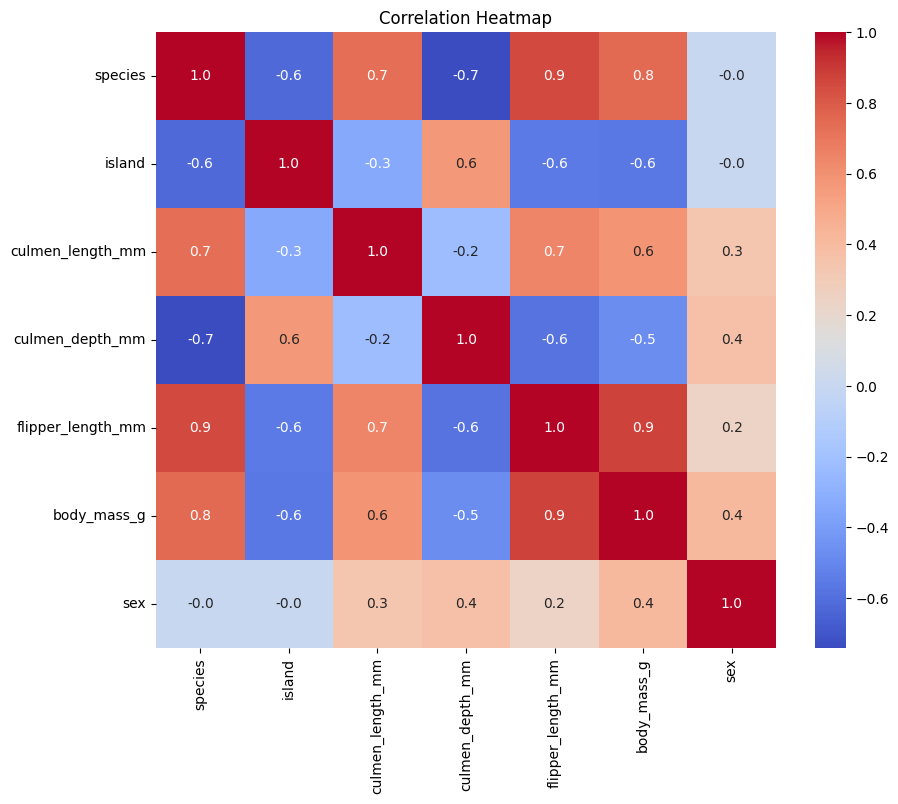

In [13]:
#10
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Correlation Heatmap")
plt.show()
# Variabel yang paling berkorelasi positif dengan spesies adalah panjang sayap (flipper_length_mm),
# yang menunjukkan bahwa panjang sayap penguin dapat menjadi indikator yang kuat untuk mengidentifikasi spesies tertentu.
# panjang culmen dan massa tubuh juga menunjukkan korelasi positif yang tinggi dengan spesies.
# Ini berarti bahwa pengukuran panjang culmen (bagian dari paruh) dan massa tubuh penguin cenderung berhubungan langsung dengan spesies yang berbeda
# pulau dan kedalaman culmen menunjukkan korelasi negatif yang tinggi dengan spesies.
# Hal ini mungkin menunjukkan bahwa penguin dari pulau tertentu memiliki karakteristik fisik yang berbeda

# hasil dari heatmap korelasi memberikan wawasan penting tentang faktor-faktor yang dapat membantu dalam mengidentifikasi spesies penguin.
# Panjang sayap, panjang culmen, dan massa tubuh adalah variabel yang paling relevan,
# sementara jenis kelamin tidak memberikan kontribusi yang signifikan dalam klasifikasi spesies.


## Machine Learning

1. Splitting X and y

In [14]:
#1
X = df.drop(['species'], axis = 1)
y = df['species']
# split

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [15]:
#2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# code ini untuk split data yang ingin di train dan di test, dengan test sixe nya 20%

In [16]:
#3
X_train.shape, X_test.shape
# code ini dengan metode shape dapat menge-check dan mengetahui dimensi atau ukuran dari dua objek, yaitu X_train dan X_test

((267, 6), (67, 6))

## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [17]:
#Criterion Entropy
#a
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
clf_en.fit(X_train, y_train)
# modelling decision tree dengan criterion entropy

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [18]:
#b
y_pred_en = clf_en.predict(X_test)
# predict x test

In [19]:
#c
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))
# print berapa accuracy score dengan model entropy

Model accuracy score with criterion entropy: 0.9701


In [20]:
#d
print('Training set score: {0:0.4f}' .format(clf_en.score(X_train, y_train)))
print('Test set score: {0:0.4f}' .format(clf_en.score(X_test, y_test)))

Training set score: 0.9625
Test set score: 0.9701


[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\nentropy = 1.524\nsamples = 267\nvalue = [115, 55, 97]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 42.35\nentropy = 0.938\nsamples = 164\nvalue = [113.0, 50.0, 1.0]'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'x[2] <= 16.7\nentropy = 0.078\nsamples = 105\nvalue = [104, 1, 0]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.592\nsamples = 7\nvalue = [6, 1, 0]'),
 Text(0.25, 0.125, 'entropy = 0.0\nsamples = 98\nvalue = [98, 0, 0]'),
 Text(0.5, 0.375, 'x[4] <= 4075.0\nentropy = 0.736\nsamples = 59\nvalue = [9, 49, 1]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.159\nsamples = 43\nvalue = [1, 42, 0]'),
 Text(0.5833333333333334, 0.125, 'entropy = 1.272\nsamples = 16\nvalue = [8, 7, 1]'),
 Text(0.75, 0.625, 'x[2] <= 17.65\nentropy = 0.417\nsamples = 103\nvalue = [2.0, 5.0, 96.0]'),
 Text(0.6458333333333333, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 96\nvalue = [0, 0, 96]'),
 Text(

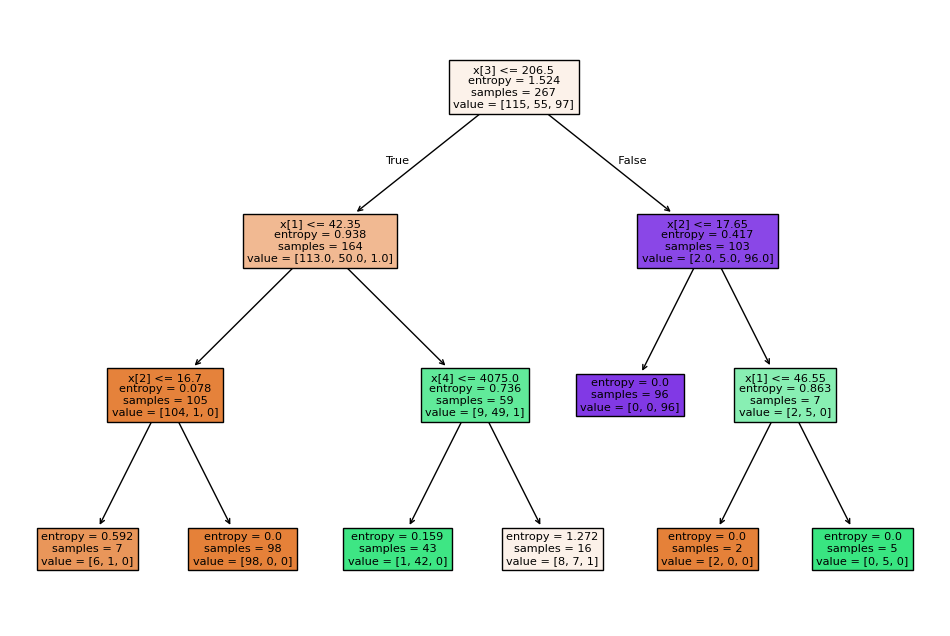

In [21]:
#e
plt.figure(figsize = (12,8))
tree.plot_tree(clf_en.fit(X_train, y_train), filled = True)

2. Criterion Gini index

In [22]:
#a
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
clf_gini.fit(X_train, y_train)
# modelling decision tree dengan menggunakan criterion gini

DecisionTreeClassifier(max_depth=3, random_state=0)

In [23]:
#b
y_pred_gini = clf_gini.predict(X_test)
# predict x test

In [24]:
#c
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9851


In [25]:
#d
print('Training set score: {0:0.4f}' .format(clf_gini.score(X_train, y_train)))
print('Test set score: {0:0.4f}' .format(clf_gini.score(X_test, y_test)))

Training set score: 0.9738
Test set score: 0.9851


[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\ngini = 0.64\nsamples = 267\nvalue = [115, 55, 97]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 43.35\ngini = 0.432\nsamples = 164\nvalue = [113.0, 50.0, 1.0]'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'x[1] <= 42.35\ngini = 0.068\nsamples = 113\nvalue = [109, 4, 0]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.019\nsamples = 105\nvalue = [104, 1, 0]'),
 Text(0.25, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [5, 3, 0]'),
 Text(0.5, 0.375, 'x[0] <= 1.5\ngini = 0.18\nsamples = 51\nvalue = [4, 46, 1]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.117\nsamples = 49\nvalue = [2.0, 46.0, 1.0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.75, 0.625, 'x[2] <= 17.65\ngini = 0.129\nsamples = 103\nvalue = [2.0, 5.0, 96.0]'),
 Text(0.6458333333333333, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 96\nvalue = [0, 0, 96]'),
 Text(0.8333333333333334, 0.375, 

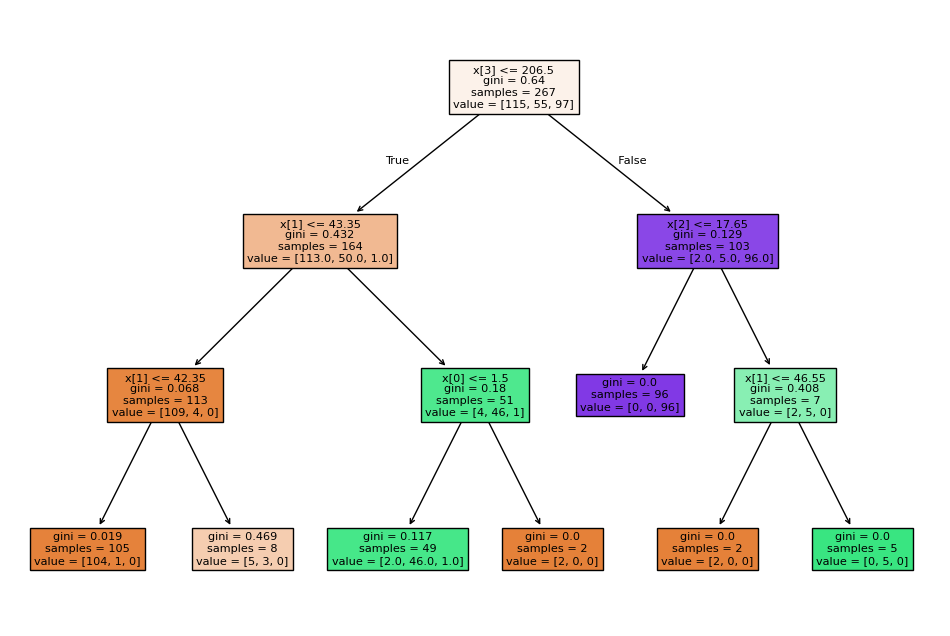

In [26]:
#e
plt.figure(figsize = (12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train), filled = True)

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [27]:
#f
entropi = confusion_matrix(y_test, y_pred_en)
gini = confusion_matrix(y_test, y_pred_gini)
print('Confusion matrix entropy: \n', entropi)
print('Confusion matrix gini index: \n', gini)

Confusion matrix entropy: 
 [[30  1  0]
 [ 1 12  0]
 [ 0  0 23]]
Confusion matrix gini index: 
 [[31  0  0]
 [ 1 12  0]
 [ 0  0 23]]


In [28]:
#g
print('Classification Report Entropy')
print(classification_report(y_test, y_pred_en))
print('Classification Report Gini Index')
print(classification_report(y_test, y_pred_gini))

Classification Report Entropy
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.92      0.92      0.92        13
           2       1.00      1.00      1.00        23

    accuracy                           0.97        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.97      0.97      0.97        67

Classification Report Gini Index
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



In [29]:
#h
# Kedua model menunjukkan kinerja yang luar biasa dalam klasifikasi spesies penguin,
# namun model Gini Index lebih unggul dengan akurasi 0.99 dibandingkan 0.97 pada model Entropy
# model Gini Index pilihan yang lebih baik untuk aplikasi praktis

# -- Entropy --
# Precision: Kelas 0 mencapai 0.97, kelas 1 mencapai 0.92, dan kelas 2 mencapai 1.00.
# Ini menunjukkan bahwa model sangat akurat dalam prediksinya, terutama untuk kelas 2.
# Recall: Kelas 0 dan kelas 1 memiliki recall masing-masing 0.97 dan 0.92, sedangkan kelas 2 mencapai 1.00.
# F1-Score: Semua kelas memiliki F1-score tinggi, dengan kelas 0 dan 1 di 0.97, dan kelas 2 di 1.00, yang menunjukkan keseimbangan baik antara precision dan recall.
# Akurasi: Model ini memiliki akurasi keseluruhan 0.97, atau 97% benar

# -- Gini --
# Precision: Kelas 0 mencapai 0.97, kelas 1 mencapai 1.00, dan kelas 2 juga 1.00, menunjukkan akurasi tinggi dalam prediksi semua kelas.
# Recall: Kelas 0 memiliki recall 1.00, kelas 1 mencapai 0.92, dan kelas 2 mencapai 1.00.
# F1-Score: Kelas 0 memiliki nilai 0.98, kelas 1 mencapai 0.96, dan kelas 2 mencapai 1.00, menunjukkan performa yang sangat baik.
# Akurasi: Model Gini Index memiliki akurasi keseluruhan 0.99, lebih tinggi dibandingkan dengan model Entropy.

## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [30]:
#a
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
# modelling dengan Naive Bayes Classifier

GaussianNB()

In [31]:
#b
nb_y_pred = nb_classifier.predict(X_test)
# predict x test

In [32]:
#c
Gauss = confusion_matrix(y_test, nb_y_pred)
print('Confusion matrix GaussianNB: \n', Gauss)

#d
print('Accuracy Score with GaussianNB: {0:0.1f}'.format(accuracy_score(y_test, nb_y_pred)))
print('Training set score: {0:0.4f}' .format(nb_classifier.score(X_train, y_train)))
print('Test set score: {0:0.4f}' .format(nb_classifier.score(X_test, y_test)))

# printing accuracy score dan confussion matrix dari model Naive Bayes Clasifier

Confusion matrix GaussianNB: 
 [[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]
Accuracy Score with GaussianNB: 1.0
Training set score: 0.9588
Test set score: 1.0000


In [33]:
#e
print('Classification Report GaussianNB')
print(classification_report(y_test, nb_y_pred))
# Classification Report dari Naive Bayes Clasifier di print dan menjelaskan precision, recal, f1 score, support

Classification Report GaussianNB
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [34]:
#f
# Model ini menunjukkan kinerja yang sangat baik dalam mengklasifikasikan spesies penguin, dengan mencapai akurasi keseluruhan sebesar 100%.
# Semua metrik, termasuk precision, recall, dan F1-score, mencapai nilai maksimal.
# Ini menandakan bahwa model ini sangat efektif dan dapat diandalkan untuk aplikasi praktis dalam klasifikasi spesies.

# Precision menggambarkan seberapa tepat prediksi yang dibuat oleh model.
# Dalam laporan ini, precision untuk semua kelas (0, 1, dan 2) adalah 1.00. Ini berarti bahwa setiap kali model memprediksi suatu kelas, prediksinya selalu

# Recall mengukur kemampuan model dalam mengidentifikasi contoh yang benar dari masing-masing kelas. Di sini, recall juga mencapai 1.00 untuk semua kelas.

# F1-score adalah kombinasi dari precision dan recall yang memberikan gambaran seimbang tentang kinerja model.
# F1-score yang tinggi (1.00) di semua kelas menunjukkan bahwa model tidak hanya akurat dalam prediksi,
# tetapi juga efektif dalam mengidentifikasi semua contoh yang relevan.

Good Luck :)